<a href="https://colab.research.google.com/github/AasthaPatel19/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('customer_segmentation.csv')

# Display basic information and check for missing values
print(data.info())
print(data.isnull().sum())

# Display the first few rows of the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9354 entries, 0 to 9353
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer     9354 non-null   int64  
 1   order        9354 non-null   int64  
 2   total_items  9354 non-null   float64
 3   discount%    9354 non-null   float64
 4   weekday      9354 non-null   int64  
 5   hour         9354 non-null   int64  
 6   Food%        9354 non-null   float64
 7   Fresh%       9354 non-null   float64
 8   Drinks%      9354 non-null   float64
 9   Home%        9354 non-null   float64
 10  Beauty%      9354 non-null   float64
 11  Health%      9354 non-null   float64
 12  Baby%        9354 non-null   float64
 13  Pets%        9354 non-null   float64
 14  num_orders   9354 non-null   float64
 15  labels       9354 non-null   int64  
 16  class        9354 non-null   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 1.2+ MB
None
customer       0
order     

In [2]:
from sklearn.preprocessing import MinMaxScaler

# Checking for outliers
numerical_columns = ['total_items', 'discount%', 'Food%', 'Fresh%', 'Drinks%',
                     'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%', 'num_orders']

# Display summary statistics
print(data[numerical_columns].describe())

# Normalizing the numerical features
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Save the cleaned data (optional)
data.to_csv('cleaned_customer_segmentation.csv', index=False)


       total_items    discount%        Food%       Fresh%      Drinks%  \
count  9354.000000  9354.000000  9354.000000  9354.000000  9354.000000   
mean     32.022679    11.857907    25.886560    15.173542    23.717923   
std      18.724271    19.372177    24.018227    19.856395    21.745537   
min       4.250000   -31.820000     0.000000     0.000000     0.000000   
25%      19.446970     2.560000     9.608750     0.000000     7.880250   
50%      28.763889     5.750000    20.900000     4.867000    18.971500   
75%      40.000000    12.382500    33.802500    26.487083    33.567292   
max     147.500000   100.000000   100.000000   100.000000   100.000000   

             Home%      Beauty%      Health%        Baby%        Pets%  \
count  9354.000000  9354.000000  9354.000000  9354.000000  9354.000000   
mean     15.517726     6.083896     1.280169    11.036040     1.144381   
std      18.024529    11.766312     5.089555    23.515242     6.224596   
min       0.000000     0.000000     0

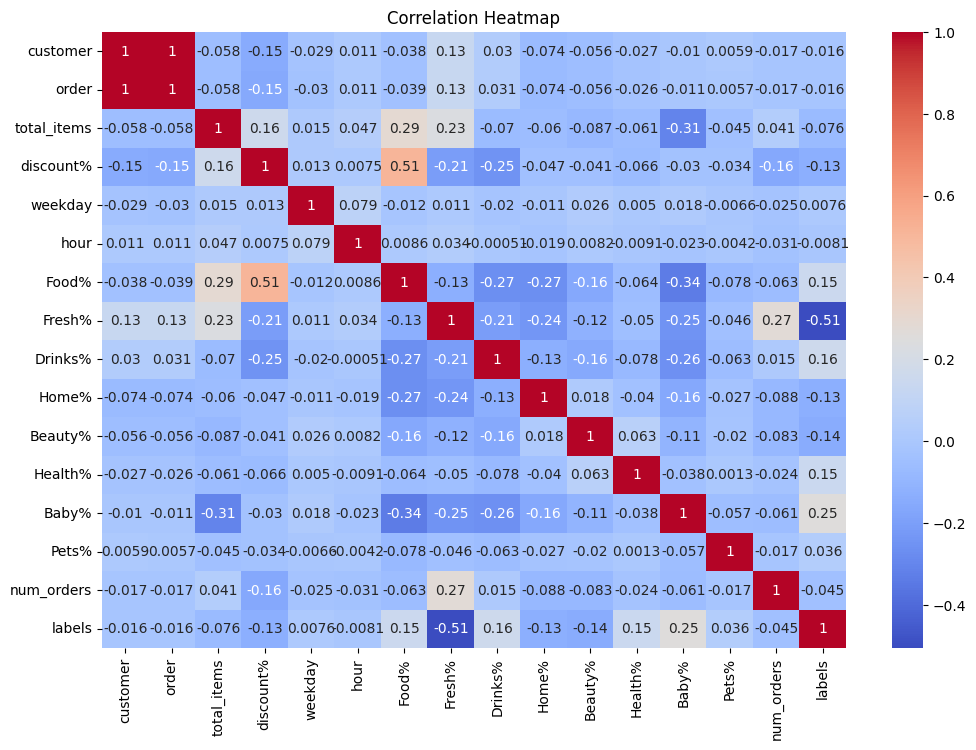

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


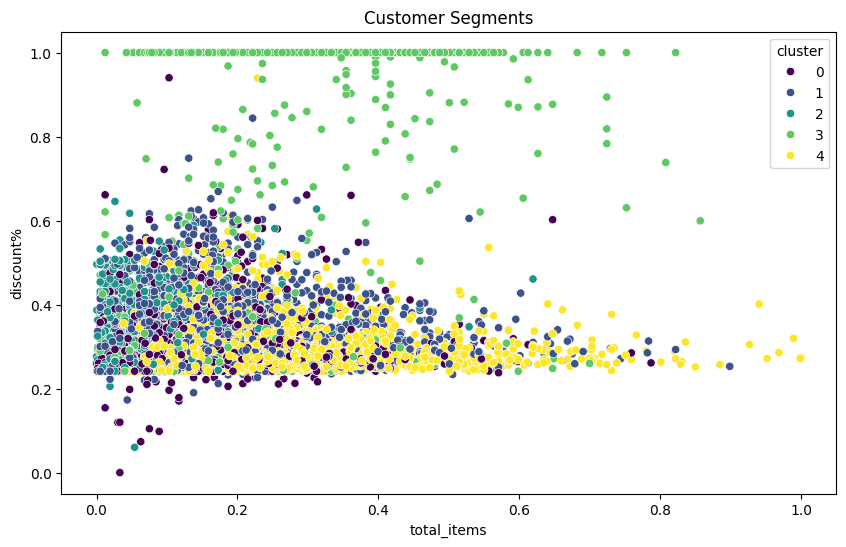

In [4]:
from sklearn.cluster import KMeans

# Selecting features for clustering
features = data[['total_items', 'discount%', 'Food%', 'Fresh%', 'Drinks%',
                 'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%']]

# Defining the K-Means model
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(features)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_items', y='discount%', hue='cluster', data=data, palette='viridis')
plt.title('Customer Segments')
plt.show()


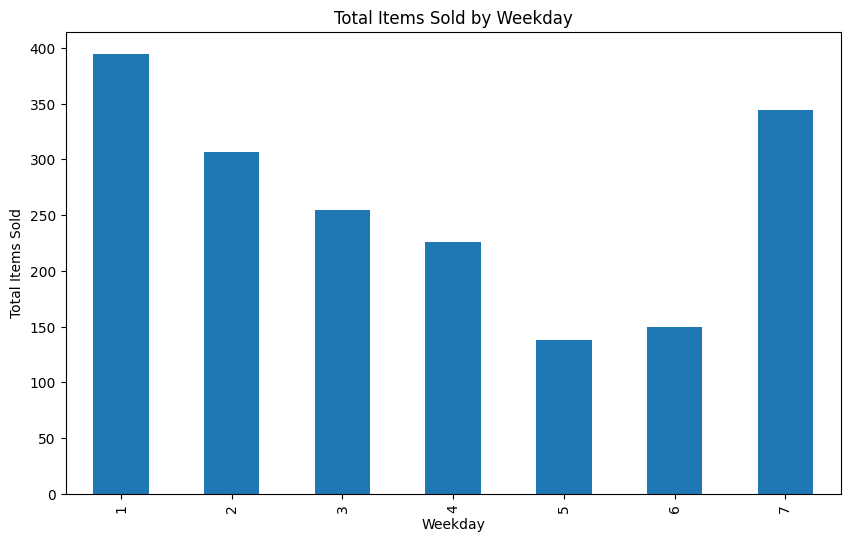

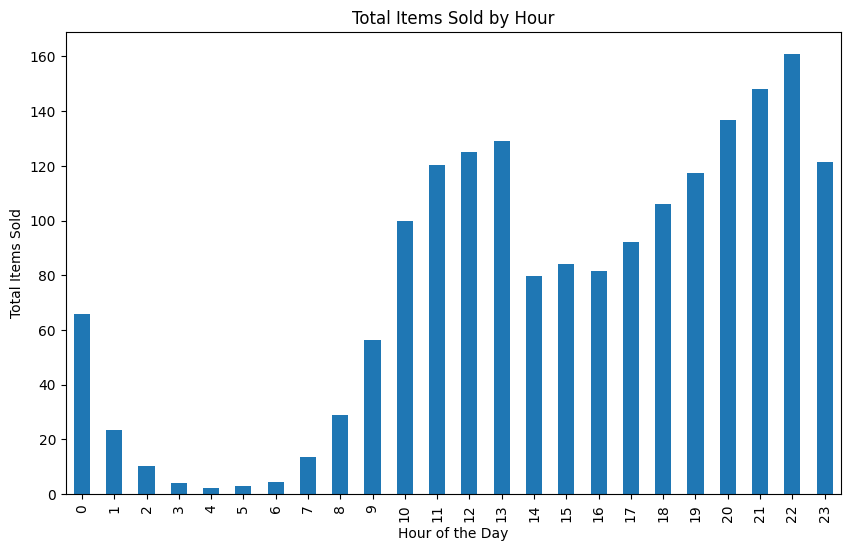

In [5]:
# Analyzing sales trends by weekday and hour
sales_by_weekday = data.groupby('weekday')['total_items'].sum()
sales_by_hour = data.groupby('hour')['total_items'].sum()

# Plotting sales by weekday
plt.figure(figsize=(10, 6))
sales_by_weekday.plot(kind='bar')
plt.title('Total Items Sold by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Items Sold')
plt.show()

# Plotting sales by hour
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='bar')
plt.title('Total Items Sold by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Items Sold')
plt.show()
